## A1



In [35]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

# Data in tabular form
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Calculate entropy
def entropy(values):
    counts = Counter(values)
    probabilities = [x / len(values) for x in counts.values()]
    return -sum([p * np.log2(p) for p in probabilities])

# Information gain
def info_gain(df, feature, target):
    total_entropy = entropy(df[target])
    values, counts = np.unique(df[feature], return_counts=True)
    
    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(df[df[feature] == values[i]][target]) for i in range(len(values)))
    return total_entropy - weighted_entropy

# Calculate info gain for each feature
for feature in df.columns[:-1]:
    gain = info_gain(df, feature, 'buys_computer')
    print(f'Information Gain for {feature}: {gain}')


Information Gain for age: 0.24674981977443933
Information Gain for income: 0.02922256565895487
Information Gain for student: 0.15183550136234159
Information Gain for credit_rating: 0.04812703040826949


## A2

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Converting categorical data to numerical
df_encoded = pd.get_dummies(df.drop('buys_computer', axis=1))
y = df['buys_computer'].apply(lambda x: 1 if x == 'yes' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.3, random_state=42)

# Create Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Print depth of the tree
print(f'Depth of the Decision Tree: {model.get_depth()}')


Depth of the Decision Tree: 3


## A3

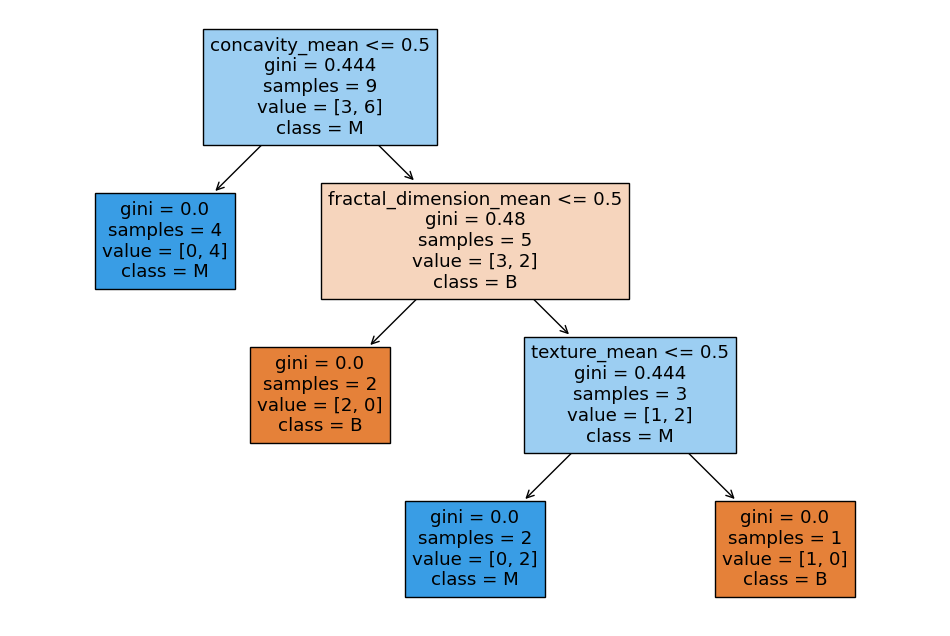

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['B', 'M'])
plt.show()


## A4

In [52]:
# Train-test accuracy on the provided data
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f'Training Set Accuracy: {train_accuracy}')
print(f'Test Set Accuracy: {test_accuracy}')


Training Set Accuracy: 1.0
Test Set Accuracy: 0.6


## A5

Training Set Accuracy with max_depth=5: 1.0
Test Set Accuracy with max_depth=5: 0.6


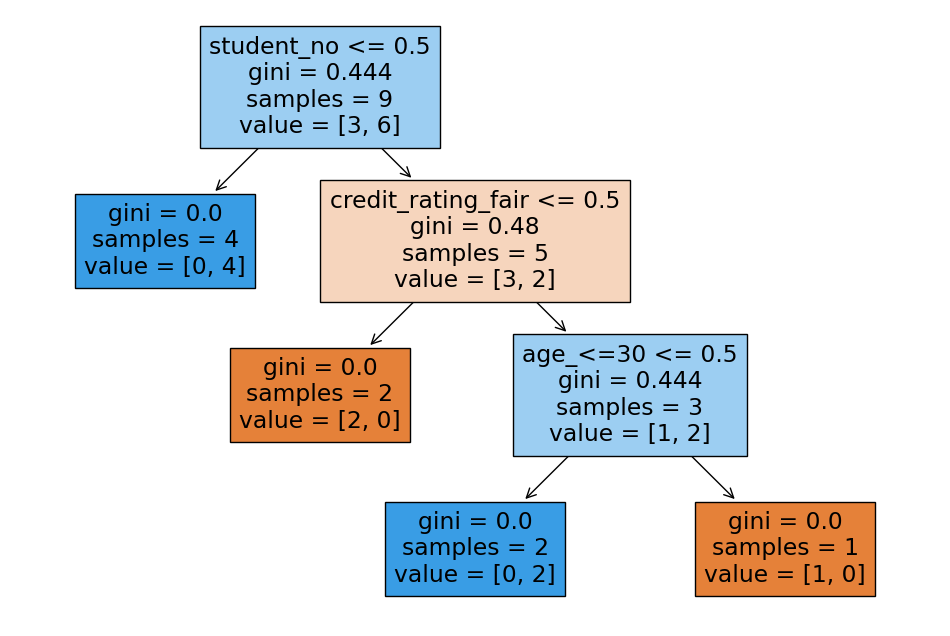

In [54]:
# Decision Tree with max_depth constraint
model_max_depth = DecisionTreeClassifier(max_depth=5)
model_max_depth.fit(X_train, y_train)

# Check accuracies
train_accuracy_max_depth = model_max_depth.score(X_train, y_train)
test_accuracy_max_depth = model_max_depth.score(X_test, y_test)

print(f'Training Set Accuracy with max_depth=5: {train_accuracy_max_depth}')
print(f'Test Set Accuracy with max_depth=5: {test_accuracy_max_depth}')

# Visualize the tree with max_depth constraint
plt.figure(figsize=(12, 8))
plot_tree(model_max_depth, feature_names=df_encoded.columns, filled=True)
plt.show()


## A6

Training Set Accuracy with Entropy: 1.0
Test Set Accuracy with Entropy: 0.6


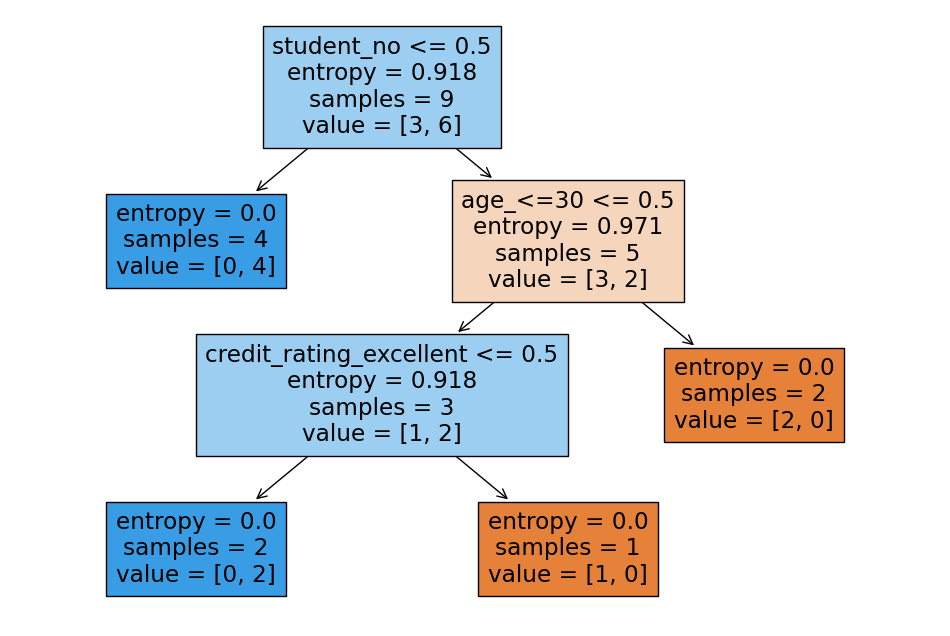

In [56]:
# Decision Tree with criterion set to "entropy"
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(X_train, y_train)

# Print accuracies
train_accuracy_entropy = model_entropy.score(X_train, y_train)
test_accuracy_entropy = model_entropy.score(X_test, y_test)

print(f'Training Set Accuracy with Entropy: {train_accuracy_entropy}')
print(f'Test Set Accuracy with Entropy: {test_accuracy_entropy}')

# Visualize the tree with entropy criterion
plt.figure(figsize=(12, 8))
plot_tree(model_entropy, feature_names=df_encoded.columns, filled=True)
plt.show()
